In [3]:
import pandas as pd 
data_dir = "C:/Users/jessi/Downloads/green_tripdata_2018-10.csv"
df= pd.read_csv(data_dir)
# uploading the dataset 

In [4]:
df.corr(numeric_only=True)
#exploring the correlation between the columns 

,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,congestion surcharge
passenger count,1.000000,-0.006923,-0.003364,-0.006520,-0.005146,0.001563,-0.003033,NaN,0.027579,-0.002805,NaN
trip distance,-0.006923,1.000000,0.925063,0.340935,0.026852,0.148349,0.409466,NaN,-0.259175,0.916713,NaN
fare amount,-0.003364,0.925063,1.000000,0.499124,0.019400,0.143790,0.364385,NaN,-0.299086,0.983422,NaN
extra,-0.006520,0.340935,0.499124,1.000000,0.120920,-0.104614,0.146354,NaN,-0.732333,0.494971,NaN
mta tax,-0.005146,0.026852,0.019400,0.120920,1.000000,0.005307,-0.002634,NaN,0.518558,0.031251,NaN
tip amount,0.001563,0.148349,0.143790,-0.104614,0.005307,1.000000,0.063805,NaN,0.106736,0.285421,NaN
tolls amount,-0.003033,0.409466,0.364385,0.146354,-0.002634,0.063805,1.000000,NaN,-0.095474,0.451922,NaN
ehail fee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
improvement surcharge,0.027579,-0.259175,-0.299086,-0.732333,0.518558,0.106736,-0.095474,NaN,1.000000,-0.272278,NaN
total amount,-0.002805,0.916713,0.983422,0.494971,0.031251,0.285421,0.451922,NaN,-0.272278,1.000000,NaN


In [5]:
def rename_columns(df):
#     make all cols lower case
    df.columns = df.columns.str.lower()
    # Iterate through the column names and replace space with underscore,
#     using list comprehension
    df.columns = [col.replace(' ', '_') for col in df.columns]
    
rename_columns(df)



In [6]:
# Calculating sum of null entries and percentage of null entries
sum_null = df.isnull().sum()
perc_null = df.isnull().sum() / len(df)
perc_null_mean = df.isnull().mean()*100
perc_null

vendor                   0.000000
lpep_pickup_datetime     0.000000
lpep_dropoff_datetime    0.000000
store_and_fwd_flag       0.030362
rate_type                0.000000
pu_location              0.000000
do_location              0.000000
passenger_count          0.031338
trip_distance            0.000000
fare_amount              0.000000
extra                    0.530834
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
ehail_fee                0.999904
improvement_surcharge    0.000000
total_amount             0.000000
payment_type             0.028459
trip_type                0.000000
congestion_surcharge     1.000000
dtype: float64

In [7]:
df=df.drop(columns=['congestion_surcharge'])
# dropping the congestion_surcharge column as it is empty

df= df.drop_duplicates()
# dropping the duplicate rows

df['store_and_fwd_flag'].unique() # MCAR as it doesn't have any relation with any other variables  
df=df.dropna( subset=['store_and_fwd_flag']) #dropping missing values less than 5%

df['passenger_count'].unique()#MCAR
df=df.dropna( subset=['passenger_count']) #dropping missing values less than 5%

df['extra'].unique() #exploring the extra column values
df["extra"] = df["extra"].fillna(value=0) # imputing the extra nan values with 0 (MAR)

df['ehail_fee'].unique() #exploring the ehail_fee values
df=df.drop('ehail_fee',axis=1) # dropping it as it is almost empty

df['payment_type'].unique() #exploring the values of the payment_types
df["payment_type"] = df["payment_type"].fillna(value='Uknown') # (MAR) imputing the nans with Unknown 

In [8]:
# Calculating sum of null entries and percentage of null entries
sum_null = df.isnull().sum()
perc_null = df.isnull().sum() / len(df)
perc_null_mean = df.isnull().mean()*100
perc_null

vendor                   0.0
lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
store_and_fwd_flag       0.0
rate_type                0.0
pu_location              0.0
do_location              0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
dtype: float64

In [9]:
def skewness(df):
    for column in df.columns:
        if(df[column].dtype==float):
            skeww = df[column].skew()
            print(f"Skewness of {column}: {skeww}")
      

skewness(df) # a generated method to observe the skewness of each column

Skewness of passenger_count: 165.67991372381786
Skewness of trip_distance: 2.7316722271547893
Skewness of fare_amount: 3.425102008337911
Skewness of extra: 1.01896199526069
Skewness of mta_tax: -8.582580919307313
Skewness of tip_amount: 39.265901929526144
Skewness of tolls_amount: 148.50727833184314
Skewness of improvement_surcharge: -4.685642954155484
Skewness of total_amount: 3.5433692688906095


In [10]:
def iqr(df):
    for column in df.columns:
        if(df[column].dtype==float):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            cut_off = IQR * 1.5
            lower = Q1 - cut_off
            upper =  Q3 + cut_off
            df1 = df[df[column]> upper]
            df2 = df[df[column] < lower]
            print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

iqr(df) # iqr helps in detecting the outliers (those are the number of outliers in each numerical column)

Total number of outliers are 102546
Total number of outliers are 60938
Total number of outliers are 49919
Total number of outliers are 561
Total number of outliers are 12736
Total number of outliers are 41673
Total number of outliers are 27243
Total number of outliers are 34453
Total number of outliers are 52371


In [11]:
df['passenger_count'].value_counts()

passenger_count
1.0      606410
2.0       53435
5.0       23811
6.0       11705
3.0        9989
4.0        3579
7.0          10
8.0           7
444.0         5
9.0           5
Name: count, dtype: int64

In [12]:
import numpy as np
def handling_with_mean(df,column):
    
    median = df[column].median()
    cutoff_pos = df[column].mean() + df[column].std() * 3
    cutoff_neg = df[column].mean() - df[column].std() * 3
    condition_series = ((df[column]> cutoff_pos) | (df[column] < cutoff_neg))
    df[column] = np.where(condition_series, median,df[column])
            


 # handling the outliers with mean       
handling_with_mean(df,'passenger_count')
df['passenger_count'].value_counts()

passenger_count
1.0    618142
2.0     53435
5.0     23811
3.0      9989
4.0      3579
Name: count, dtype: int64

In [13]:
handling_with_mean(df,'passenger_count')
df['passenger_count'].value_counts()

passenger_count
1.0    645532
2.0     53435
3.0      9989
Name: count, dtype: int64

In [14]:
def flooring_capping(df,column):
    floor = df[column].quantile(0.10)
    cap = df[column].quantile(0.90)
    df[column] = np.where(df[column] <floor, floor,df[column])
    df[column] = np.where(df[column] >cap,cap,df[column])
    
    #imputing the outliers using the flooring and capping technique
flooring_capping(df,'tip_amount')
df['tip_amount'].value_counts()

tip_amount
0.00    454443
3.09     71125
1.00     18207
2.00     13258
3.00      5235
         ...  
0.38         1
0.37         1
2.99         1
2.87         1
1.87         1
Name: count, Length: 305, dtype: int64

In [15]:
def update_total_amount(df):
    df['total_amount'] = df['fare_amount'] + df['extra'] + df['mta_tax'] + df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge']

    # summing up all those columns to update the total_amount in case any of the values has been imputed

In [16]:
update_total_amount(df)

In [17]:
def change_datatype(df, column, format):
    df[column] = pd.to_datetime(df[column], format=format)


    # changing the datatype of the lpep pickup datetime and the lpep dropoff datetime into datetime 
   



In [16]:
df.corr(numeric_only=True)
#exploring the correlation between the columns 

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
passenger_count,1.000000,-0.002078,0.002906,0.018640,-0.027662,0.008191,-0.002590,0.021335,0.003691
trip_distance,-0.002078,1.000000,0.931582,-0.068956,0.023277,0.045470,0.393788,-0.165894,0.927731
fare_amount,0.002906,0.931582,1.000000,-0.059393,0.013654,0.053280,0.359099,-0.136184,0.989442
extra,0.018640,-0.068956,-0.059393,1.000000,0.126307,0.070053,-0.025342,0.193380,-0.020178
mta_tax,-0.027662,0.023277,0.013654,0.126307,1.000000,0.046870,-0.004643,0.649404,0.030070
tip_amount,0.008191,0.045470,0.053280,0.070053,0.046870,1.000000,-0.000383,0.124448,0.142131
tolls_amount,-0.002590,0.393788,0.359099,-0.025342,-0.004643,-0.000383,1.000000,-0.061089,0.455035
improvement_surcharge,0.021335,-0.165894,-0.136184,0.193380,0.649404,0.124448,-0.061089,1.000000,-0.109482
total_amount,0.003691,0.927731,0.989442,-0.020178,0.030070,0.142131,0.455035,-0.109482,1.000000


In [18]:

def one_hot_encode_column(df, column):
    one_hot = pd.get_dummies(df[column], prefix=column)
    
  
    one_hot = one_hot.astype(int)
    
    df = pd.concat([df, one_hot], axis=1)
    df.drop(column, axis=1, inplace=True)
    
    return df
# generating one-hot encoding method



df = one_hot_encode_column(df, 'vendor')


In [19]:

from sklearn import preprocessing

def number_encode_features(df,column):
        df[column] = preprocessing.LabelEncoder().fit_transform(df[column])
        return df
   
    
            # Apply LabelEncoder method


df=number_encode_features(df,'store_and_fwd_flag')
df=one_hot_encode_column(df,'rate_type')


In [20]:


def frequency_encoding(df, column):
    # Calculate the frequency of each category
    frequency_map = df[column].value_counts(normalize=True).to_dict()

    # Map the frequency values to the column
    df[column + '_freq_encoded'] = df[column].map(frequency_map)
 



    return df
# applying the frequency encoding technqiue

df=frequency_encoding(df,'pu_location')
df=frequency_encoding(df,'do_location')
df=number_encode_features(df,'payment_type')
df= number_encode_features(df,'trip_type')

In [21]:
df.corr(numeric_only=True)

,store_and_fwd_flag,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,...,"vendor_Creative Mobile Technologies, LLC",vendor_VeriFone Inc.,rate_type_Group ride,rate_type_JFK,rate_type_Nassau or Westchester,rate_type_Negotiated fare,rate_type_Newark,rate_type_Standard rate,pu_location_freq_encoded,do_location_freq_encoded
store_and_fwd_flag,1.000000,0.004616,-0.007005,-0.005695,0.005154,-0.003082,0.003353,0.006046,0.005108,-0.004213,...,0.121727,-0.121727,0.007164,-0.000262,-0.000243,-0.004227,0.004385,0.003642,-0.009590,-0.008170
passenger_count,0.004616,1.000000,-0.002078,0.002906,0.018640,-0.027662,0.008191,-0.002590,0.021335,0.003691,...,0.040335,-0.040335,-0.001118,0.000196,0.002119,-0.025130,0.004094,0.023727,0.003926,0.000134
trip_distance,-0.007005,-0.002078,1.000000,0.931582,-0.068956,0.023277,0.045470,0.393788,-0.165894,0.927731,...,-0.043957,0.043957,-0.002448,0.097443,0.075118,0.210790,0.046705,-0.237510,-0.241928,-0.311199
fare_amount,-0.005695,0.002906,0.931582,1.000000,-0.059393,0.013654,0.053280,0.359099,-0.136184,0.989442,...,-0.046912,0.046912,-0.003707,0.122234,0.099215,0.197500,0.065437,-0.234225,-0.245568,-0.321355
extra,0.005154,0.018640,-0.068956,-0.059393,1.000000,0.126307,0.070053,-0.025342,0.193380,-0.020178,...,0.028298,-0.028298,-0.003019,0.053607,-0.001840,-0.174934,-0.004432,0.159761,0.049739,0.037164
mta_tax,-0.003082,-0.027662,0.023277,0.013654,0.126307,1.000000,0.046870,-0.004643,0.649404,0.030070,...,0.002544,-0.002544,-0.004221,-0.008489,0.000229,-0.377281,-0.124976,0.379821,0.048623,0.014084
tip_amount,0.003353,0.008191,0.045470,0.053280,0.070053,0.046870,1.000000,-0.000383,0.124448,0.142131,...,0.120157,-0.120157,-0.002562,0.025052,0.008834,-0.118325,0.008616,0.107999,0.088141,-0.080204
tolls_amount,0.006046,-0.002590,0.393788,0.359099,-0.025342,-0.004643,-0.000383,1.000000,-0.061089,0.455035,...,-0.019265,0.019265,-0.000559,0.098039,0.031354,0.074241,0.095910,-0.104551,-0.061373,-0.068917
improvement_surcharge,0.005108,0.021335,-0.165894,-0.136184,0.193380,0.649404,0.124448,-0.061089,1.000000,-0.109482,...,0.058788,-0.058788,-0.002409,-0.000464,0.003551,-0.868988,0.002107,0.842951,0.142752,0.081663
total_amount,-0.004213,0.003691,0.927731,0.989442,-0.020178,0.030070,0.142131,0.455035,-0.109482,1.000000,...,-0.034731,0.034731,-0.003929,0.130815,0.098193,0.172470,0.072923,-0.212233,-0.228874,-0.317254


In [22]:
import pandas as pd
import numpy as np


# Calculate the quantiles for 3 bins (low, medium, high)
quantiles = df['total_amount'].quantile([0.33, 0.66]).values

# Function to categorize fare amount
def categorize_fare(fare):
    if fare <= quantiles[0]:
        return 'low'
    elif fare <= quantiles[1]:
        return 'medium'
    else:
        return 'high'

# Apply the categorization function to the fare_amount column
df['fare_category'] = df['total_amount'].apply(categorize_fare)

print(df['fare_category'].unique())

df=number_encode_features(df,'fare_category')


['high' 'low' 'medium']


In [23]:
print(df['fare_category'].value_counts())

fare_category
0    240244
1    235066
2    233646
Name: count, dtype: int64


In [22]:
# from sklearn.model_selection import train_test_split



# selected_features = [
#      'trip_distance', 'fare_amount',
#     'tip_amount'

# ]
# X = df[selected_features]
# y=df['fare_category']


# # First, split the data into 80% training and 20% remaining
# X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)

# # Then, split the remaining data into 50% validation and 50% test
# # Since 20% of the original data is 25% of the remaining data,
# # we set the test size to 0.25 to get 20% of the original data as the test set
# X_validation, X_test, y_validation, y_test = train_test_split(X_remaining, y_remaining, test_size=0.25, random_state=42)

# # Now, X_train, y_train contain 60% of the original data as the training set
# # X_validation, y_validation contain 20% of the original data as the validation set
# # X_test, y_test contain 20% of the original data as the test set

# # 'test_size=0.2' specifies that 20% of the data will be used for testing,
# # and the remaining 80% will be used for training.

# # 'random_state=42' is a random seed that ensures reproducibility.
# # You can choose any integer value or omit it for a different random split each time.


In [33]:
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

# # Assuming you have your DataFrame 'df' loaded

# # Selected features (already defined in your code)
# selected_features = [
#     'trip_distance', 'fare_amount'
# ]

# # Split the data into training and remaining sets (80% training, 20% remaining)
# X = df[selected_features]
# y = df['fare_category']
# X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)

# # Further split the remaining data into validation and test sets (50% each)
# X_validation, X_test, y_validation, y_test = train_test_split(X_remaining, y_remaining, test_size=0.25, random_state=42)

# # Create the KNN model (choose an appropriate number of neighbors based on your data)
# knn = KNeighborsClassifier(n_neighbors=3)  # Adjust n_neighbors as needed

# # Train the model on the training data
# knn.fit(X_train, y_train)

# # Make predictions on the validation set
# y_pred_validation = knn.predict(X_validation)

# # Evaluate the model's performance on the validation set (e.g., accuracy)
# validation_accuracy = accuracy_score(y_validation, y_pred_validation)
# print("Validation Accuracy:", validation_accuracy)

# # Make predictions on the test set (use the final model for evaluation)
# y_pred_test = knn.predict(X_test)

# # Evaluate the model's performance on the test set (e.g., accuracy)
# test_accuracy = accuracy_score(y_test, y_pred_test)
# print("Test Accuracy:", test_accuracy)


Validation Accuracy: 0.8773884751372903
Test Accuracy: 0.8768900925299029


In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split, learning_curve

# # Assuming you have your DataFrame 'df' loaded

# # Selected features (already defined in your code)
# selected_features = [
#     'trip_distance', 'fare_amount'
# ]

# X = df[selected_features]
# y = df['fare_category']

# # Split the data into training and testing sets (80/20 split)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define training set sizes for learning curve generation
# train_sizes, train_scores, test_scores = learning_curve(
#     KNeighborsClassifier(n_neighbors=3), X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
# )

# # Average training and test scores across cross-validation folds
# train_scores_mean = train_scores.mean(axis=1)
# test_scores_mean = test_scores.mean(axis=1)

# # Plot the learning curve
# plt.plot(train_sizes, train_scores_mean, label='Training Score')
# plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
# plt.ylabel('Accuracy Score')
# plt.xlabel('Training Set Size')
# plt.title('Learning Curve for KNN Classifier')
# plt.grid(True)
# plt.legend()
# plt.show()

# # (Optional) Train the final model using the entire training data
# knn = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed
# knn.fit(X_train, y_train)

# # Make predictions and evaluate on the test set (using the final model)
# y_pred_test = knn.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_pred_test)
# print("Test Accuracy:", test_accuracy)


In [ ]:
# from sklearn.model_selection import learning_curve
# from sklearn.neighbors import KNeighborsClassifier
# import numpy as np
# import matplotlib.pyplot as plt

# # Create a KNN classifier instance (adjust n_neighbors as needed)
# knn_classifier = KNeighborsClassifier(n_neighbors=3)

# # Learning Curves
# train_sizes, train_scores, validation_scores = learning_curve(knn_classifier, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# train_scores_mean = np.mean(train_scores, axis=1)
# validation_scores_mean = np.mean(validation_scores, axis=1)

# plt.figure()
# plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
# plt.plot(train_sizes, validation_scores_mean, 'o-', color='g', label='Validation score')
# plt.xlabel('Training size')
# plt.ylabel('Accuracy')
# plt.title('Learning Curves (KNN)')
# plt.legend(loc='best')
# plt.show()


In [25]:
# from sklearn.model_selection import train_test_split



# selected_features = [
#      'trip_distance', 'fare_amount',
#     'tip_amount'

# ]
# X = df[selected_features]
# y=df['fare_category']


# # First, split the data into 80% training and 20% remaining
# X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)

# # Then, split the remaining data into 50% validation and 50% test
# # Since 20% of the original data is 25% of the remaining data,
# # we set the test size to 0.25 to get 20% of the original data as the test set
# X_validation, X_test, y_validation, y_test = train_test_split(X_remaining, y_remaining, test_size=0.25, random_state=42)

# # Now, X_train, y_train contain 60% of the original data as the training set
# # X_validation, y_validation contain 20% of the original data as the validation set
# # X_test, y_test contain 20% of the original data as the test set

# # 'test_size=0.2' specifies that 20% of the data will be used for testing,
# # and the remaining 80% will be used for training.

# # 'random_state=42' is a random seed that ensures reproducibility.
# # You can choose any integer value or omit it for a different random split each time.


In [40]:
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

# # Assuming you have your DataFrame 'df' loaded


# # Further split the remaining data into validation and test sets (50% each)
# X_validation, X_test, y_validation, y_test = train_test_split(X_remaining, y_remaining, test_size=0.25, random_state=42)

# # Create the KNN model (choose an appropriate number of neighbors based on your data)
# knn = KNeighborsClassifier(n_neighbors=50)  # Adjust n_neighbors as needed

# # Train the model on the training data
# knn.fit(X_train, y_train)

# # Make predictions on the validation set
# y_pred_validation = knn.predict(X_validation)

# # Evaluate the model's performance on the validation set (e.g., accuracy)
# validation_accuracy = accuracy_score(y_validation, y_pred_validation)
# print("Validation Accuracy:", validation_accuracy)

# # Make predictions on the test set (use the final model for evaluation)
# y_pred_test = knn.predict(X_test)

# # Evaluate the model's performance on the test set (e.g., accuracy)
# test_accuracy = accuracy_score(y_test, y_pred_test)
# print("Test Accuracy:", test_accuracy)


Validation Accuracy: 0.9752407282028135
Test Accuracy: 0.9744414353419093


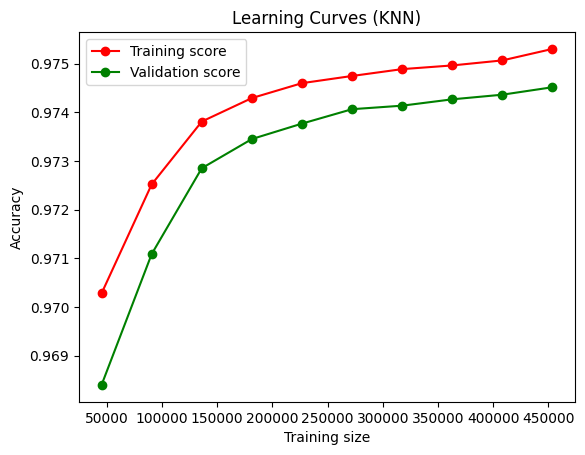

In [41]:
# from sklearn.model_selection import learning_curve
# from sklearn.neighbors import KNeighborsClassifier
# import numpy as np
# import matplotlib.pyplot as plt

# # Create a KNN classifier instance (adjust n_neighbors as needed)
# knn_classifier = KNeighborsClassifier(n_neighbors=50)

# # Learning Curves
# train_sizes, train_scores, validation_scores = learning_curve(knn_classifier, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# train_scores_mean = np.mean(train_scores, axis=1)
# validation_scores_mean = np.mean(validation_scores, axis=1)

# plt.figure()
# plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
# plt.plot(train_sizes, validation_scores_mean, 'o-', color='g', label='Validation score')
# plt.xlabel('Training size')
# plt.ylabel('Accuracy')
# plt.title('Learning Curves (KNN)')
# plt.legend(loc='best')
# plt.show()


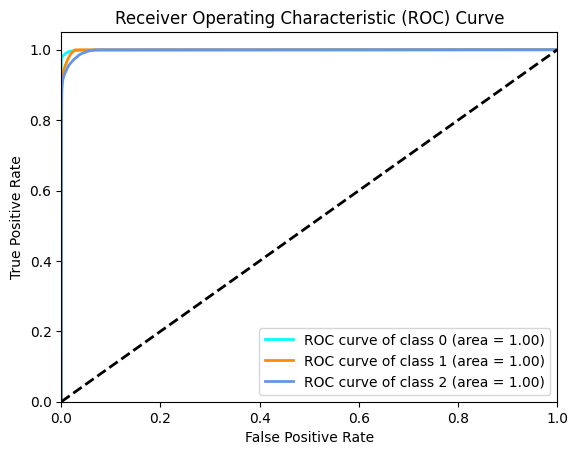

In [44]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Binarize the output labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

# Create a KNN classifier instance (adjust n_neighbors as needed)
knn_classifier = KNeighborsClassifier(n_neighbors=50)

# Fit the classifier on the training data using One-vs-Rest strategy
ovr_classifier = OneVsRestClassifier(knn_classifier)
ovr_classifier.fit(X_train, y_train)

# Predict probabilities for the test data
y_prob = ovr_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


 the ROC curves in the image show that the model is performing well at classifying positive cases, especially for class 0 for k=50

Confusion Matrix:
[[47414     6   859]
 [    0 46046   599]
 [  298  1777 44793]]


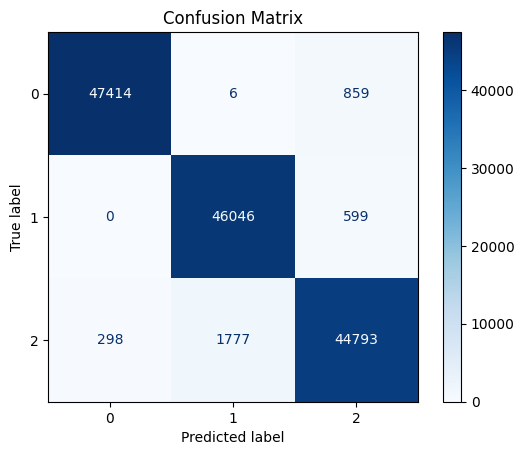

In [45]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# import matplotlib.pyplot as plt

# # Assuming X and y are already defined
# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a KNN classifier instance (adjust n_neighbors as needed)
# knn_classifier = KNeighborsClassifier(n_neighbors=50)

# # Fit the classifier on the training data
# knn_classifier.fit(X_train, y_train)

# # Predict the classes for the test data
# y_pred = knn_classifier.predict(X_test)

# # Compute the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Print the confusion matrix
# print("Confusion Matrix:")
# print(cm)

# # Plot the confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
# plt.show()


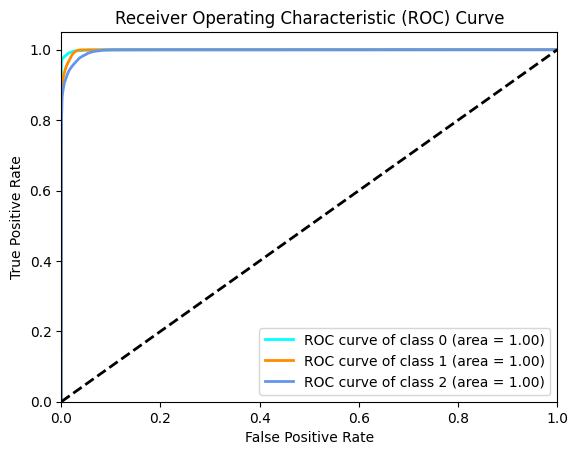

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Assuming X and y are already defined
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Binarize the output labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

# Create a KNN classifier instance (adjust n_neighbors as needed)
knn_classifier = KNeighborsClassifier(n_neighbors=650)

# Fit the classifier on the training data using One-vs-Rest strategy
ovr_classifier = OneVsRestClassifier(knn_classifier)
ovr_classifier.fit(X_train, y_train)

# Predict probabilities for the test data
y_prob = ovr_classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In conclusion, the ROC curve in the image shows that the model is performing well at classifying positive cases. for k=650

In [24]:
from sklearn.model_selection import train_test_split

# Select features and target variable
selected_features = ['trip_distance', 'fare_amount', 'tip_amount']
X = df[selected_features]
y = df['fare_category']
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_remaining, y_remaining, test_size=0.25, random_state=42)




In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=50)  # You can adjust the number of neighbors as needed

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predictions on the validation set
y_pred_validation = knn_classifier.predict(X_validation)

# Calculate accuracy on the validation set
validation_accuracy = accuracy_score(y_validation, y_pred_validation)
print("Validation Accuracy:", validation_accuracy)

# Now, you can also evaluate the model on the test set after finalizing the hyperparameters.
# Predictions on the test set
y_pred_test = knn_classifier.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)


Validation Accuracy: 0.9752407282028135
Test Accuracy: 0.9744414353419093


This represent a well preforming model that doesn't overfit for k=50

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=650)  # You can adjust the number of neighbors as needed

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predictions on the validation set
y_pred_validation = knn_classifier.predict(X_validation)

# Calculate accuracy on the validation set
validation_accuracy = accuracy_score(y_validation, y_pred_validation)
print("Validation Accuracy:", validation_accuracy)

# Now, you can also evaluate the model on the test set after finalizing the hyperparameters.
# Predictions on the test set
y_pred_test = knn_classifier.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)


Validation Accuracy: 0.9699936056571128
Test Accuracy: 0.9697867298578199


This represent a well preforming model that doesn't overfit for k=650

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     36218
           1       0.96      0.99      0.98     35110
           2       0.97      0.96      0.96     35016

    accuracy                           0.98    106344
   macro avg       0.98      0.98      0.98    106344
weighted avg       0.98      0.98      0.98    106344



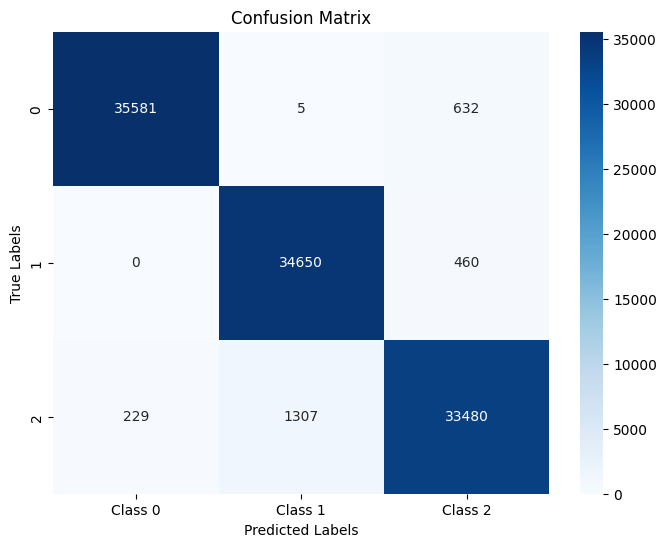

In [31]:
# from sklearn.metrics import classification_report, confusion_matrix
# import seaborn as sns


# # Define the value of k
# k = 50  # For example, k is set to 5

# # Create a KNN classifier with the specified value of k
# knn_classifier = KNeighborsClassifier(n_neighbors=k)

# # Fit the classifier on the training data
# knn_classifier.fit(X_train, y_train)

# # Predictions on the validation set
# y_pred_validation = knn_classifier.predict(X_validation)

# # Calculate and print classification report
# print("Classification Report:")
# print(classification_report(y_validation, y_pred_validation))

# # Calculate and plot confusion matrix
# conf_matrix = confusion_matrix(y_validation, y_pred_validation)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'])
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     36218
           1       0.96      0.98      0.97     35110
           2       0.96      0.95      0.95     35016

    accuracy                           0.97    106344
   macro avg       0.97      0.97      0.97    106344
weighted avg       0.97      0.97      0.97    106344



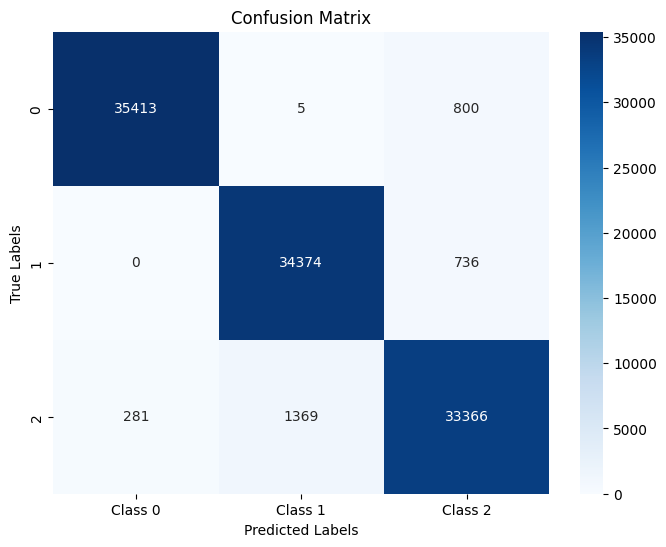

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


# Define the value of k
k = 650 # For example, k is set to 5

# Create a KNN classifier with the specified value of k
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predictions on the validation set
y_pred_validation = knn_classifier.predict(X_validation)

# Calculate and print classification report
print("Classification Report:")
print(classification_report(y_validation, y_pred_validation))

# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_validation, y_pred_validation)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


The high values on the diagonal of the confusion matrix confirm that the model is making a large number of correct predictions for each class. This directly reflects a well-performing model without relying on the classification report. Confusion matrix for k = 650 


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     36218
           1       0.96      0.99      0.98     35110
           2       0.97      0.96      0.96     35016

    accuracy                           0.98    106344
   macro avg       0.98      0.98      0.98    106344
weighted avg       0.98      0.98      0.98    106344



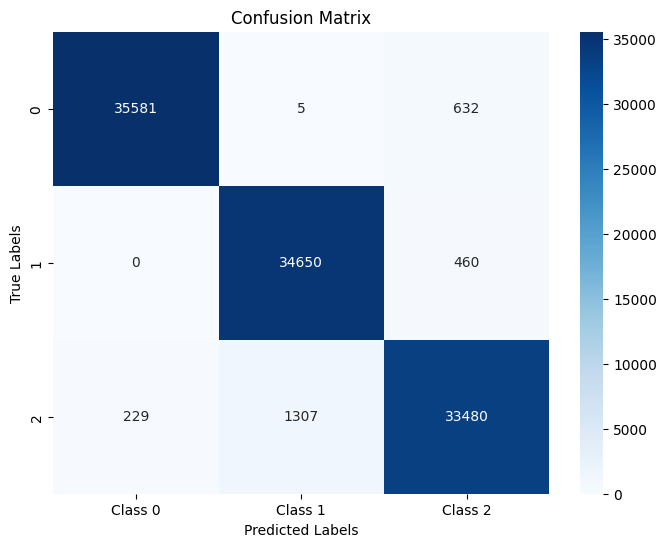

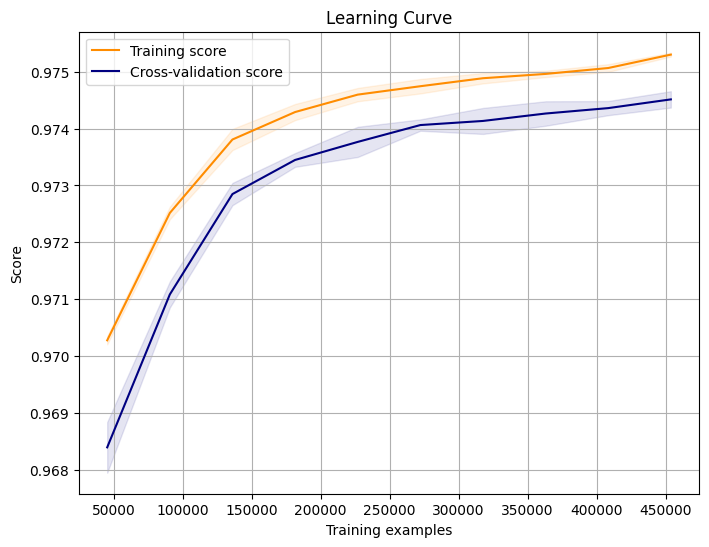

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

# Define the value of k
k = 50  # For example, k is set to 5

# Create a KNN classifier with the specified value of k
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Generate learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    knn_classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5
)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

# Convert scores to errors
train_errors = 1 - train_scores_mean
valid_errors = 1 - valid_scores_mean

# Plot learning curve against errors
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_errors, label='Training error', color='darkorange')
plt.plot(train_sizes, valid_errors, label='Validation error', color='navy')
plt.xlabel('Training examples')
plt.ylabel('Error')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


The high values on the diagonal of the confusion matrix confirm that the model is making a large number of correct predictions for each class. This directly reflects a well-performing model without relying on the classification report. Confusion matrix 



The error rate goes down as the number of training examples increases, which is a positive sign. This suggests that the KNN model is learning from the data and improving its performance on the task.he validation error curve is following the training error curve, which is a good sign. It suggests that the model is not overfitting the data for k=50

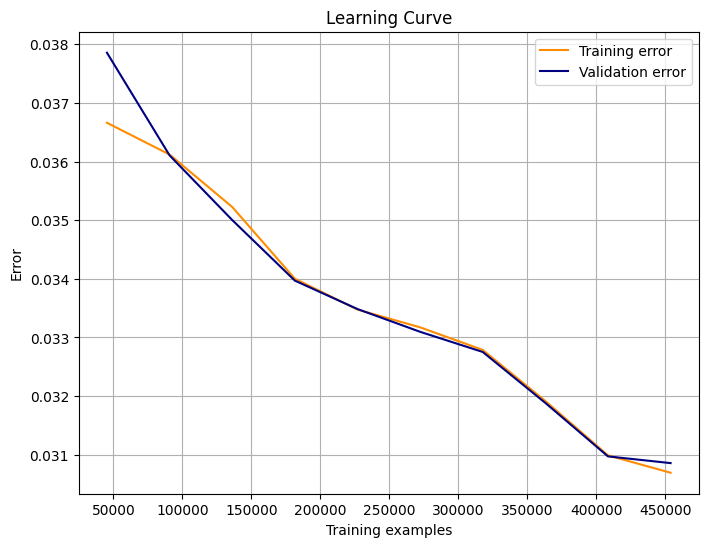

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

# Define the value of k
k = 650  # For example, k is set to 5

# Create a KNN classifier with the specified value of k
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Generate learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    knn_classifier, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5
)

# Calculate mean and standard deviation for training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

# Convert scores to errors
train_errors = 1 - train_scores_mean
valid_errors = 1 - valid_scores_mean

# Plot learning curve against errors
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_errors, label='Training error', color='darkorange')
plt.plot(train_sizes, valid_errors, label='Validation error', color='navy')
plt.xlabel('Training examples')
plt.ylabel('Error')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


The error rate goes down as the number of training examples increases, which is a positive sign. This suggests that the KNN model is learning from the data and improving its performance on the task.The validation error curve is following the training error curve, which is a good sign. It suggests that the model is not overfitting the data. This is for k=650